**Общая информация**

Интернет-магазин по продаже компьютерных игр "Стримчик" планирует свою стратегию на 2017 год. Для того, чтобы понять, какие факторы влияют на успешность игры, необходимо проанализировать доступные исторические данные о продажах игр, оценках пользователей и экспертов, жанров и платформы.  В результате этого анализа необходимо установить закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Задачи проекта:** Провести исследование параметров, потенциально влияющих на продажи, установить, как эти параметры связаны между собой и с объемами продаж, как эти показатели меняются в зависимости от платформ, регионов продвижения и исторического периода. 

**Цель:** Установить факторы, определяющие популярность продукта, и спрогнозировать наиболее популярные игры для дальнейшего продвижения 

### Импорт данных

In [1]:
!pip install missingno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.ticker as ticker
from scipy import stats as st

In [2]:
data=pd.read_csv('/datasets/games.csv') #Загрузим датасет

In [3]:
data.head() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Подготовка данных

In [4]:
data.info() #Изучим общую информацию. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете большое количество пропусков в столбцах рейтинга пользователей, критиков и возрастного рейтинга. 
При этом формат данных в столбце с рейтингом пользователей строковый, в данном столбце содержатся некорректные значения. 

Рассмотрим подробнее имеющиеся данные.

#### Обработка данных по столбцам

In [5]:
data.columns=data.columns.str.lower() #заменим на строчные буквы

In [6]:
print('Уникальные названия платформ:', data['platform'].unique()) #проверка на неявные дупликаты в платформах. Неявные дубликаты отсутствуют

Уникальные названия платформ: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [7]:
data.isna().sum() #Оценим количество строк с пропусками

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

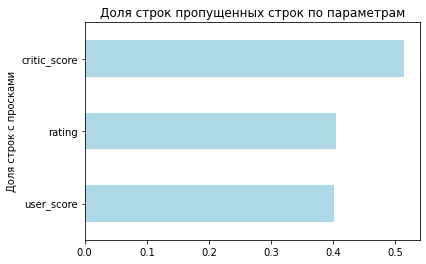

In [8]:
data[['critic_score', 'user_score', 'rating']].isna().mean().sort_values().plot(kind='barh', color='lightblue', figsize=(6,4))
plt.ylabel('Параметр') #Найдем долю строк, где значения пропущены
plt.title('Доля пропущенных строк по параметрам')
plt.show()

В столбце с рейтингами критиков доля пропусков составляет больше 50%, и около 40% в рейтинге пользователей и возрастном рейтинге

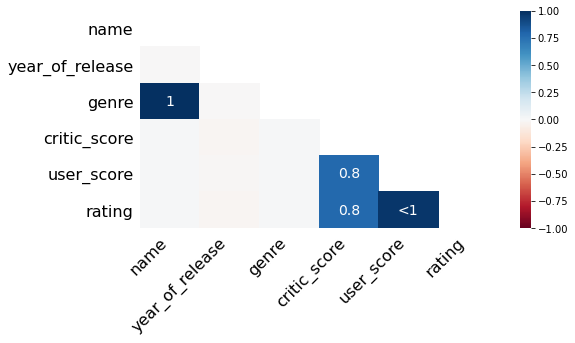

In [9]:
msno.heatmap(data, figsize=(8,4)) #Рассмотрим совпадают ли пропуски в строках по разным столбцам 
plt.show()

- Пропуски в стоблцах имя и жанр совпадают
- В большинстве случаев пропуски в столбцах пользовательского рейтинга и критиков совпадают
- Пропуски в рейтингах пользователей совпадают с пропусками в возрастном рейтинге

Возможные причины пропусков в данных столбцах:
- недостаточное количество собранных данных, если игра была малопопулярна
- невозможность дать оценку играм без возрастного рейтинга
- организация для присвоения рейтинга появилась после 1994 года, при этом она не является обязательной, на ранних этапах игры не категоризировались по этому признаку
- на ранних этапах появления платформ не было ресурсов для выставления оценок


In [10]:
data.dropna(subset=['name', 'genre'], inplace=True) #удалим строки с прощуенными именами
print('количество пропусков в столбца имя и жанр:', (data['name'].isna().sum()+data['genre'].isna().sum())) 

количество пропусков в столбца имя и жанр: 0


In [11]:
#определить выход игры, скорее всего, возможно только вручную, так как выход игры на разных платформах может сильно отличаться
data.dropna(subset=['year_of_release'], inplace=True) #исключим строки с пропуками
print('количество пропусков в столбце год выпуска:', data['year_of_release'].isna().sum())
data['year_of_release']=pd.to_datetime(data['year_of_release'], format='%Y').dt.year #заменим формат данных

количество пропусков в столбце год выпуска: 0


In [12]:
#для единобразия порядка рейтингов приведем рейтинг критиков к 10 бальной шкале
data['critic_score']=data['critic_score'].apply(lambda x: x/10) 

In [13]:
# в столбце рейтинга пользоваталей есть строки tbd, это значение соответствует пропускам, заменим это значение на nan
data.loc[data['user_score']=='tbd', 'user_score']=np.nan #заменим tbd на пропущенные значения 

In [14]:
data['user_score']=data['user_score'].astype('float') #приведем формат к численному значению

In [15]:
data['rating'].unique() #рассмотрим категории игр по возрастам

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
# Для удобства расшифруем категории рейтингов
def rating(rating):
    if rating=='E' or rating=='K-A':
        return 'Для всех'
    if rating=='M':
        return 'От 17 лет'
    if rating=='T':
        return 'От 13 лет'
    if rating == 'E10+':
        return 'От 10 лет'
    if rating == 'AO':
        return 'От 18 лет'
    if rating == 'EC':
        return 'От 3 лет'
    if rating == 'RP':
        return 'Не определен'
    else:
        return "ND"
        

In [17]:
# Создадим столбец с расшифрованными рейтингами
data['rating_new']=data['rating'].apply(rating) 
data['rating_new'].unique()

array(['Для всех', 'ND', 'От 17 лет', 'От 13 лет', 'От 10 лет',
       'От 18 лет', 'От 3 лет', 'Не определен'], dtype=object)

In [18]:
data['total_sale']=0 #создадим столбец с общими продажами
for column in data.columns:
    if 'sales' in column:
        data['total_sale']+=data[column]

In [19]:
# зададим общий формат для построения графиков
large = 22; med = 12; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (10, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med}
plt.rcParams.update(params)

#### Анализ пропусков в столбцах с рейтингами

Рассмотрим динамику и закономерности появления пропусков в столбцах. 

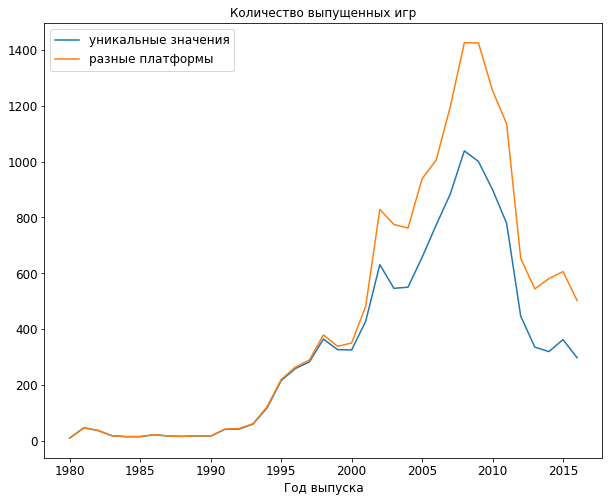

In [20]:
#Рассмотрим количество выпущенных игр за весь период наблюдений
fig, ax=plt.subplots(figsize=(10,8))
sum_un=data.pivot_table(index='year_of_release', values='name', aggfunc=lambda x: len(x.unique())) #Количество выпускаемых игр
sum_total=data.pivot_table(index='year_of_release', values='name', aggfunc='count') #Количество выпускаемых игр с учетом релиза на разных платформах
graph=sum_un.merge(sum_total, left_index=True, right_index=True).reset_index()
ax.plot(graph['year_of_release'], graph['name_x'])
ax.plot(graph['year_of_release'], graph['name_y'])
ax.set_xlabel('Год выпуска')
ax.set_title('Количество выпущенных игр')
ax.legend(['уникальные значения', 'разные платформы'])
plt.show()

Наблюдается резкий рост количества выпускаемых игр после 2000 года, также после 2000 года одна и та же игра начала появляться на разных платформах. Пик количества выпускаемых игр достигает в 2007-2008 годах, после чего падает, начинают развиваться смартфоны, мобильный интернет, компьютерные игры. 

In [21]:
# Рассмотрим, какую долю занимают игры без рейтинга в общих продажах
total_sales=data.pivot_table(index='year_of_release', values='total_sale', aggfunc='count')
total_sales_sum=data.pivot_table(index='year_of_release', values='total_sale', aggfunc='sum')

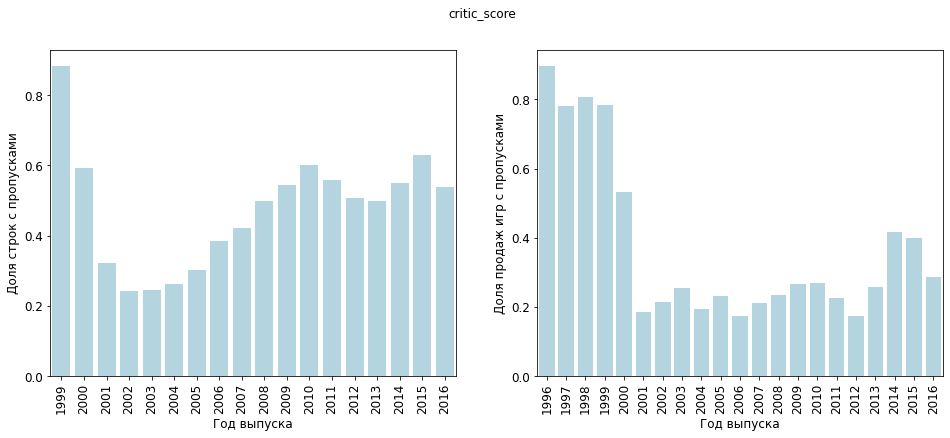

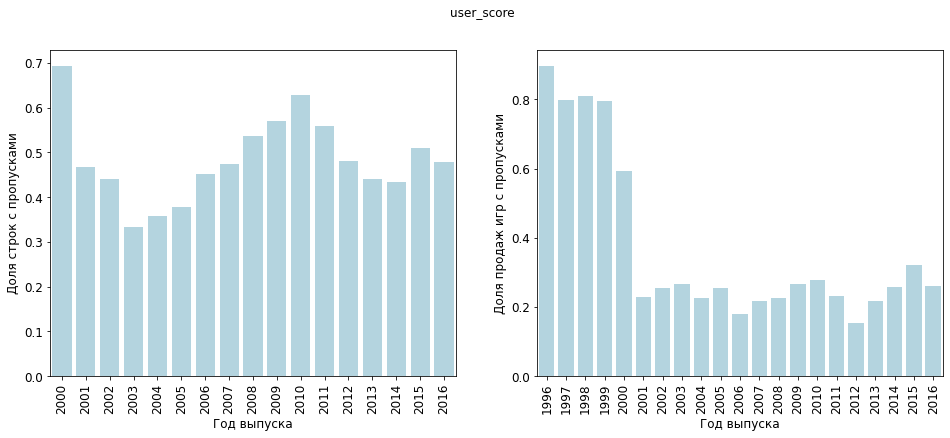

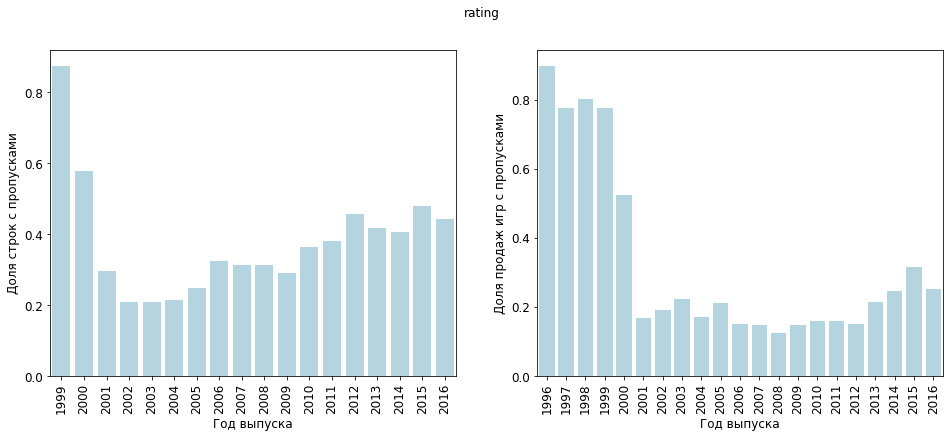

In [22]:
columns_gap=['critic_score', 'user_score', 'rating']
for column in columns_gap:
    fig = plt.figure(figsize=(16,6)) 
    score_gap=data.loc[data[column].isna()].pivot_table(index='year_of_release', values='total_sale', aggfunc='count')
    ratio_table=score_gap.merge(total_sales, right_index=True, left_index=True)
    ratio_table.columns=['nan', 'total']
    ratio_table['ratio_nan']=ratio_table['nan']/ratio_table['total']
    ratio_table=ratio_table.query('ratio_nan<0.9')
    score_gap_sum=data.loc[data[column].isna()].pivot_table(index='year_of_release', values='total_sale', aggfunc='sum')
    ratio_table_sum=score_gap_sum.merge(total_sales_sum, right_index=True, left_index=True)
    ratio_table_sum.columns=['nan', 'total']
    ratio_table_sum['ratio_nan']=ratio_table_sum['nan']/ratio_table_sum['total']
    ratio_table_sum=ratio_table_sum.query('ratio_nan<0.9')
    ax1 = fig.add_subplot(1, 2, 1)
    ax1=sns.barplot(x=ratio_table.index,
               y='ratio_nan',
               data=ratio_table,
               palette=['lightblue'])
    plt.xticks(rotation=90)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2=sns.barplot(x=ratio_table_sum.index,
               y='ratio_nan',
               data=ratio_table_sum,
               palette=['lightblue'])
    plt.xticks(rotation=90)
    ax1.set_xlabel('Год выпуска')
    ax1.set_ylabel('Доля строк с пропусками')
    ax2.set_xlabel('Год выпуска')
    ax2.set_ylabel('Доля продаж игр с пропусками')
    plt.suptitle(column)
    plt.show()


- Только после 1999 года начинают появляться отзывы пользователей, возможно, не было системы/платформы, на которой аккумулировались эти данные.
- Доля пропусков в возрастном рейтинге резко снижается после 1999 года, так как данная организация начала действовать в 1994 году и присвоение рейтинга происходило постепенно
- Можно отметить, что количество пропусков в отзывах возрастает с увеличением количества выпускаемых игр, при этом видно, что несмотря на то, что эти игра имеют существенную долю от общего количества игр, их доля от общих продаж намного ниже. Скорее всего, это малопопулярные игры, которые не набрали нужного количества отзывов для формирования оценки 
- Количество пропусков  в рейтинге пользователей/критиков начинает увеличиваться после 2005 года, скорее всего, это связано с выпуском нового поколения консолей, для которых выпускалось большое количество разных малопопулярных игр
- Так как количество пропусков высокое, при этом относятся они скорее всего к малопопулярным играм, а также очевидной зависимости от других параметров для них нет, заполнение их посторонними данными нецелесообразно

#### Поиск дубликатов

In [23]:
#Поиск явных дубликатов
print('Количество явных дубликатов в датасете:', data.duplicated().sum())

Количество явных дубликатов в датасете: 0


In [24]:
# Поиск неявных дупликатов
data[data.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_new,total_sale
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,8.3,8.5,T,От 13 лет,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,8.2,8.5,T,От 13 лет,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,8.3,5.5,E,Для всех,0.01


В датасете есть три игры, дублирующиеся по параметрам название и платформа. Рассмотрим их подбробнее 

In [25]:
# Сделаем срез таблицы по игре Need for Speed: Most Wanted
data.query('name in "Need for Speed: Most Wanted" and (platform in "X360" or platform in "PC")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_new,total_sale
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,8.3,8.5,T,От 13 лет,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,8.3,8.5,T,От 13 лет,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,8.2,8.5,T,От 13 лет,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,8.2,8.5,T,От 13 лет,0.08


*Согласно информации из открытых источников, в 2012 году был перезапуск игры Need for Speed: Most Wanted	от 2005 года. Таким образом, данные строки не являются дубликатами, оставим их без изменений*

In [73]:
#Сделаем срез таблицы по игре Madden NFL 13
data.query('name in "Madden NFL 13" and platform in "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_new,total_sale
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,8.3,5.5,E,Для всех,2.56


Вторая страка для этой пары консоль-игра явно является ошибочно включенной и не несет в себе никакой информации, ее можно исключить

In [27]:
data = data.drop_duplicates(subset=['name', 'platform'], keep='first').reset_index(drop=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
 11  rating_new       16441 non-null  object 
 12  total_sale       16441 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.6+ MB


*Выводы по пункту предобработка данных*
- Были удалены строки с прорущенными значениями в годах выпуска и названий игр, так как идентифицировать их можно в основном только вручную, при этом они составляли около 1,6% от общего объема данных
- Рейтинги пользователей и критиков приведены к 10-й балльной шкале
- Дана расшифровка возрастных рейтингов в отдельном столбце. Пропускам была присвоена отдельная категория
- Заменен формат данных в столбцах рейтинг пользователей и годы выпуска
- Найдены 3 неявных дубликата в категориях название-платформа. Установлено, что два из них не являются дубликатами по сути, так как относятся к перевыпуску игр. Один дубликат был удален

### Исследовательский анализ данных

#### Анализ продаж игр для различных платформ

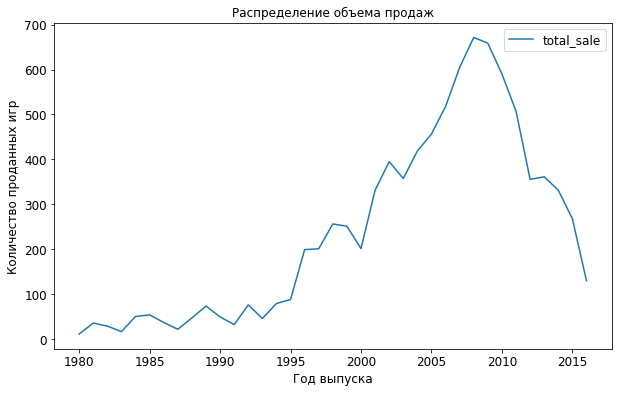

In [29]:
# Построим распределение объема продаж в течение всего периода наблюдений
(
    data.pivot_table(index='year_of_release', values='total_sale', aggfunc='sum')
    .reset_index()
    .plot(x='year_of_release', y='total_sale', figsize=(10,6))
)
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных игр')
plt.title('Распределение объема продаж')
plt.show()

In [30]:
(print('Количество проданных игр с 1980 по 1995:', data.query('1980<year_of_release<1995')['total_sale'].sum()))
(print('Количество проданных игр с 1995 по 2000:', data.query('1995<year_of_release<2000')['total_sale'].sum()))
(print('Количество проданных игр после 2000:', data.query('year_of_release>2000')['total_sale'].sum()))

Количество проданных игр с 1980 по 1995: 648.0799999999999
Количество проданных игр с 1995 по 2000: 907.6400000000001
Количество проданных игр после 2000: 6956.150000000001


*В соответствии с ростом количества выпущенных игр, рост объема продаж отмечается после 2000 года, достигая пика в 2007-2008 году. До 1995 года нет изменения в продажах игр, с 1995 по 2000 начинается медленный рост. Как видно из распределения за период 20 лет количество проданных игр составило 20% от продаж за всю историю наблюдений. При этом очевидно, что рынок игровых консолей значительно изменялся за рассматриваемый период и параметры, актуальные для 2000 года, не отражают ситуацию на рынке на текущий момент* 

In [31]:
#Зададим функцию для группировки параметров по разным признакам
def group_value(table, group, xlabel, ylabel, title):
    table.groupby(group)['total_sale'].sum().sort_values().plot(kind='barh',color='lightblue')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

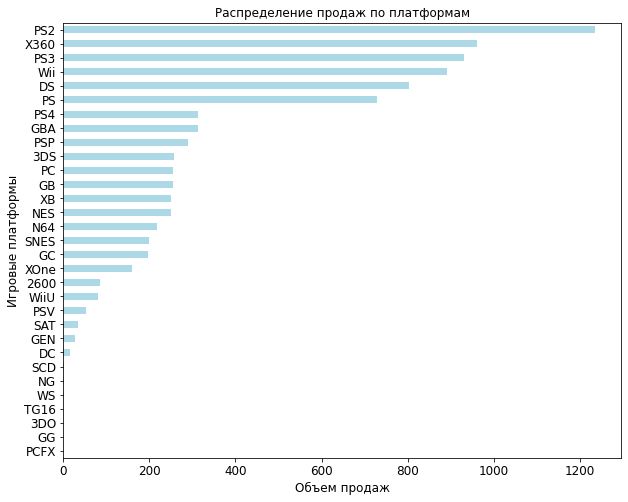

In [32]:
# построим распределение продаж по платформам
group_value(data, 'platform', 'Объем продаж', 'Игровые платформы', 'Распределение продаж по платформам')


*Наибольшее количество игр было продано для PS2, X360, PS3, Wii, DS, PS*

In [33]:
# Зададим список топ-платформ
top_platforms = data.groupby('platform')['total_sale'].sum().sort_values(ascending=False).head(6).index.values 

In [34]:
# Построим имзенение продаж наиболее продаваемых игр
#Зададим функцию для построения распрделения продаж по годам
def plot_sale(table, item_list, column, func, xlabel, ylabel, title):
    legend=[]
    fig, ax =plt.subplots() 
    for item in item_list:
        sales=(
            table[table[column] == item]
            .pivot_table(index='year_of_release', values='total_sale', aggfunc=func)
            .reset_index().plot(x='year_of_release', y='total_sale', ax=ax, style='--', marker='o', markersize=4, figsize=(12,6))
        )
        legend.append(item)
    plt.legend(legend)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    plt.title(title)
    plt.show()

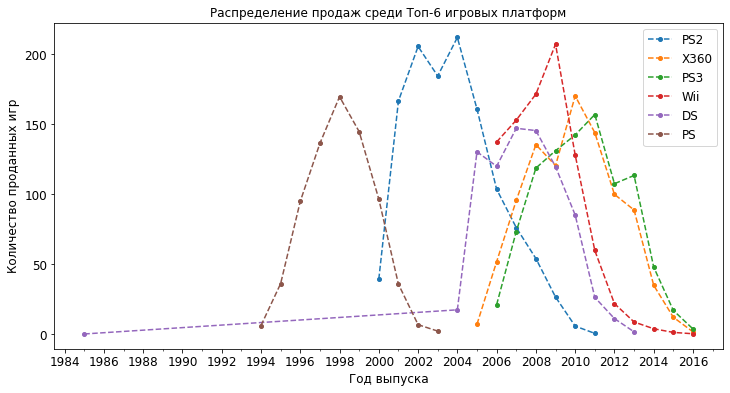

In [35]:
plot_sale(data, top_platforms, 'platform', sum, 'Год выпуска', 'Количество проданных игр', 'Распределение продаж среди Топ-6 игровых платформ')

- Запуск платформы DS был в 2004 году, единственное значение в 1985, скорее всего, было ошибочно добавлено, платформа просуществовала 9 лет до 2013 года
- PS существовало 9 лет с 1994 по 2003
- PS2 с 2000 по 2011
- Платформы X360 и Wii были выпущены в 2005 году, PS3 - в 2006 году, все они также были сняты с продаж в 2016-2017 годах 
 
 
 **На основании представленного распределения видим, что средняя продолжительность существования платформы 10 лет. Пика продаж игры для новых платформ достигают на 3-5 год жизни, после чего следует спад и снятие с продаж в связи с выходом новых версий консолей**

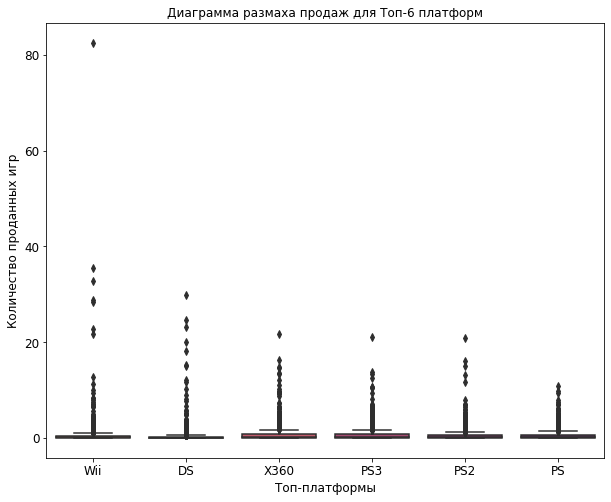

In [36]:
#Построим диаграмму размаха продаж для топ-6 платформ для общего анализа
sns.boxplot(x='platform', y='total_sale', data=data.query('platform in @top_platforms'), palette="flare")
plt.xlabel('Топ-платформы')
plt.ylabel('Количество проданных игр')
plt.title('Диаграмма размаха продаж для Топ-6 платформ')
plt.show()

**Из графика выше выидим, что отдельные игры на всех платформах продаются миллионными тиражами, при этом наиболее популярная игра была реализована на платформе Wii. Однако, такие продажи характерны для отдельных игр и исходя из общего распределения проданных игр, лидирующие позиции занимают платформы PS2 и X360. Таким образом, необходимо оценить показатели, характеризующие стабильность продаж. Для этого изменим масштаб графика для четкого отображения квартилей.** 

In [37]:
# Создадим таблицу с описательными статистиками для топ-6 платформ
data.query('platform in @top_platforms').groupby('platform')['total_sale'].describe().T

platform,DS,PS,PS2,PS3,Wii,X360
count,2121.000000,1190.000000,2127.000000,1305.000000,1286.000000,1231.000000
mean,0.378491,0.611412,0.579953,0.713663,0.692986,0.779846
std,1.436042,1.056807,1.138461,1.403467,3.165022,1.632731
min,0.010000,0.010000,0.000000,0.000000,0.010000,0.010000
25%,0.050000,0.110000,0.080000,0.110000,0.090000,0.110000
50%,0.110000,0.260000,0.230000,0.280000,0.190000,0.280000
75%,0.270000,0.660000,0.560000,0.760000,0.487500,0.770000
max,29.800000,10.950000,20.810000,21.050000,82.540000,21.820000


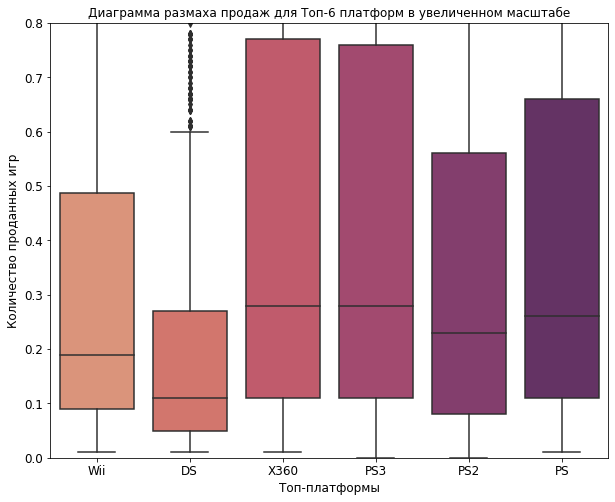

In [38]:
#Построим диаграмму размаха продаж для топ-6 платформ с измененным масштабом
sns.boxplot(x='platform', y='total_sale', data=data.query('platform in @top_platforms'), palette="flare")
plt.xlabel('Топ-платформы')
plt.ylabel('Количество проданных игр')
plt.ylim(0, 0.8)
plt.title('Диаграмма размаха продаж для Топ-6 платформ в увеличенном масштабе')
plt.show()

**При изменении масштаба диаграммы видим, что медианное значение продаж наиболее высокое у платформ PS3 и X360 (0,28 млн), при этом значение 3 квартиля также выше , из чего можно сделать вывод, что на данных платформах наибольшее количество игр, которые продаются в тиражах больше 0,3 млн, что с большей вероятностью обеспечит стабильную прибыль**

**Так как средний возраст платформ 10 лет, при этом максимум продаж приходится на 3-5 год жизни, для анализа предлагаю рассмотреть продажи после 2011 года. Этому периоду также соответствует выпуск 8-го поколения консолей. Период в 5 лет позволяет охватить возможные пики продаж на новых выпущенных консолях и оценить динамику продаж уже присутствующих на рынке несколько лет**

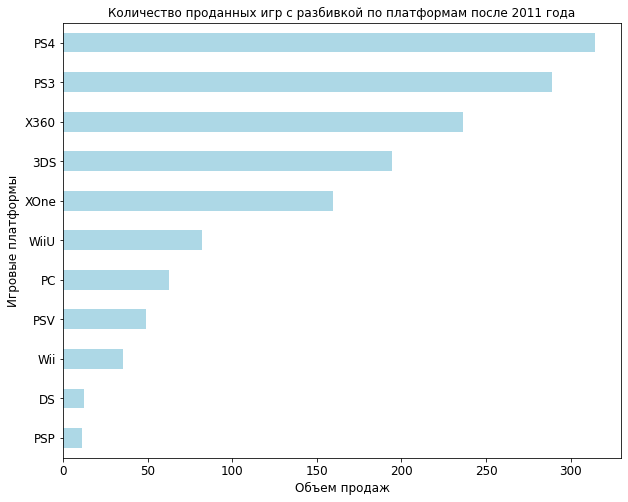

In [39]:
#Построим распределение продаж среди консолей после 2011 года
sales_2012=data.query('year_of_release>2011 and total_sale>0')
group_value(sales_2012, 'platform', 'Объем продаж', 'Игровые платформы', 'Количество проданных игр с разбивкой по платформам после 2011 года')

*После 2011 года в лидеры по продажам вышла консоль PS4, при этом доля продаж более старых платформ PS2, X360, PS3 в разрезе этого периода всё еще высокая. Видим, что количество моделей платформ к данному периоду снизилось, так как на рынке остались наиболее крупные производители.*  

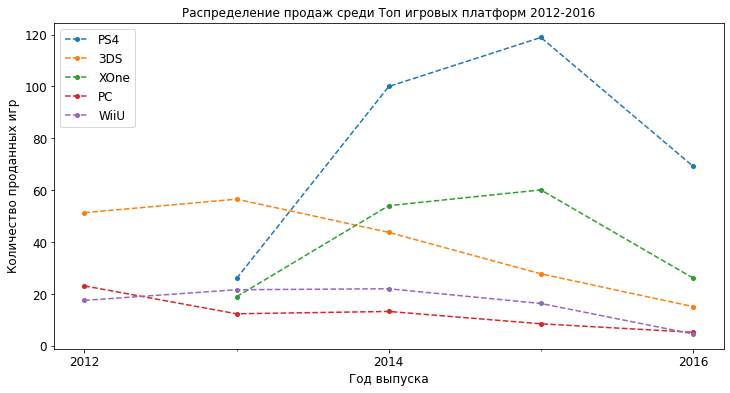

In [40]:
# Построим распределение продаж игр после 2011 года 
#Выделим в отдельную категорию платформы, которые набирали свою популярность в рассматриваемый период
top_platforms_new=['PS4', '3DS', 'XOne', 'PC', 'WiiU'] 
plot_sale(sales_2012, top_platforms_new, 'platform', sum, 'Год выпуска', 'Количество проданных игр', 'Распределение продаж среди Топ игровых платформ 2012-2016')

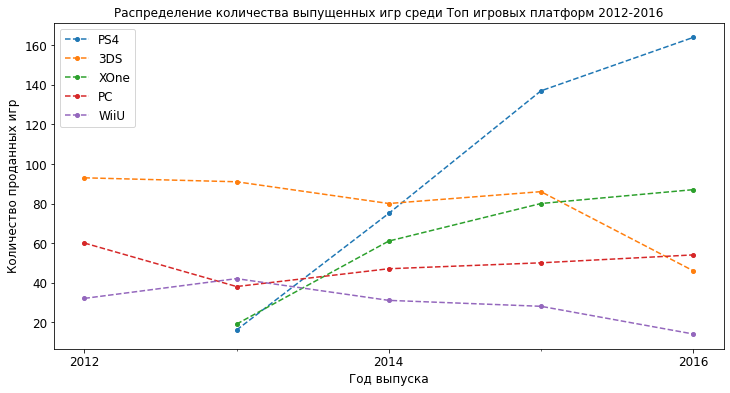

In [41]:
# Построим распределение количества выпускаемых игр после 2011 года 
plot_sale(sales_2012,top_platforms_new, 'platform', 'count', 'Год выпуска', 'Количество проданных игр', 'Распределение количества выпущенных игр среди Топ игровых платформ 2012-2016')


Объем продаж игр для всех платформ падает, что говорит о падении этого сегмента рынка в целом. При этом видим, что количство игр, выпускаемых для PS4 и XOne, растет. Производители игр делают ставки на эти платформы, так как несмотря на падающую популярность игровых платформ в целом, plastation и xbox имеют свою аудиторию, под которую расчитан выпуск игр, также увеличивается количество игр для персональных компьютеров


Продажи игр для PS4 и XOne уже прошли через свой максимум. При этом можно отметить, что максимум продаж игр для этих платформ был достигнут быстрее по сравнению с играми для консолей прошлого поколения. PS4 значительно превосходит по XOne по реализованным копиям игр, для XOne не наблюдается такого резкого роста спроса на игры в первый год выпуска консоли. Эта динамика также свидеульствует об угасающей популярности этого типа девайсов. 

**На основании данных графиков можно сделать вывод, что акцент в продвижении, следует делать на игры для консолей топовых производителей Sony, Microsoft, Nintendo. При этом необходимо понимать, планируется ли запуск новых консолей или обновление текущих в следующем году, в данном случае, целесообразно продвигать продукты под эти версии, так как это будет обеспечивать стабильный рост продаж. В разрезе 2016 года целесообразно сконцентрироваться на продвижениии игр для PS4 и XOne, так как на этот момент возраст платформ 3 года и в течение нескольких лет будет продолжаться реализация этих консолей** 

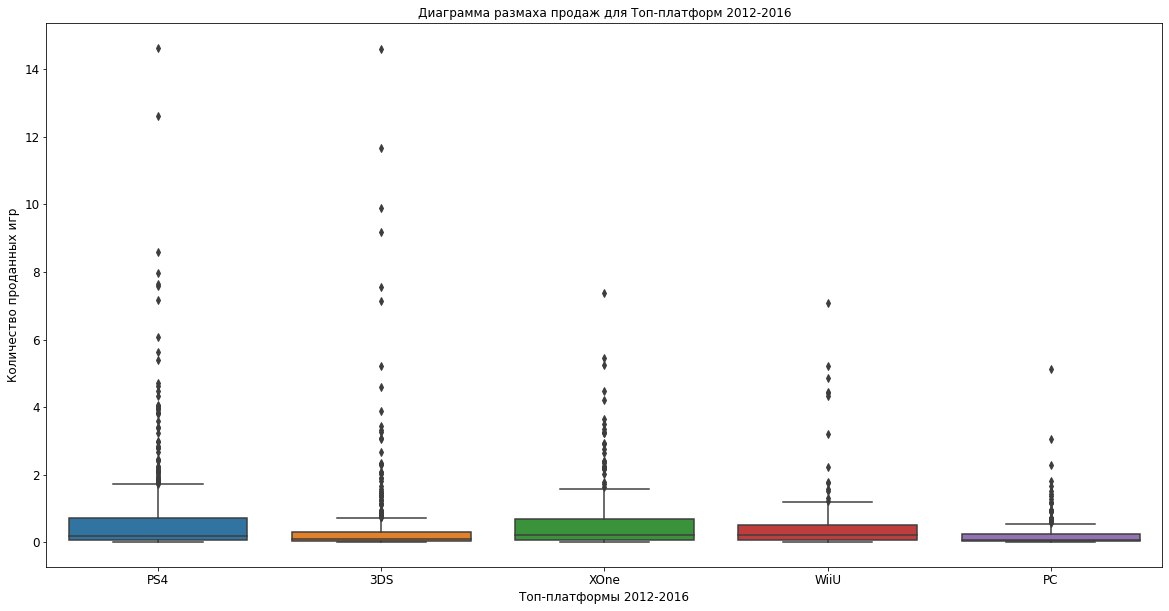

In [43]:
#Построим диаграмму размаха для топовых платформ 2012-2016 для общего анализа данных
plt.figure(figsize=[20, 10])
sns.boxplot(x='platform', y='total_sale', data=sales_2012.query('platform in @top_platforms_new'))
plt.xlabel('Топ-платформы 2012-2016')
plt.ylabel('Количество проданных игр')
plt.title('Диаграмма размаха продаж для Топ-платформ 2012-2016')
plt.show()

*Из диаграммы видим, что отдельные игры для всех платформ продаются с миллионными тиражами, при этом наиболее продаваемые игры у консолей 3DS и PS4. Эти платформы также лидируют по общему количеству продаж среди консолей, появившихся после 2011 года. Рассмотрим подробнее, что определяет высокие продажи для этих платформ, для этого построим график в увеличенном масштабе, а также таблицу с описательной статистикой*

In [44]:
# Создадим таблицу с описательными статистиками для топ-6 платформ
data.query('platform in @top_platforms_new').groupby('platform')['total_sale'].describe().T

platform,3DS,PC,PS4,WiiU,XOne
count,512.000000,956.000000,392.000000,147.000000,247.000000
mean,0.503535,0.267448,0.801378,0.559116,0.645020
std,1.441271,0.680074,1.609456,1.058836,1.036139
min,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.050000,0.020000,0.060000,0.080000,0.060000
50%,0.120000,0.050000,0.200000,0.220000,0.220000
75%,0.332500,0.170000,0.730000,0.525000,0.685000
max,14.600000,8.010000,14.630000,7.090000,7.390000


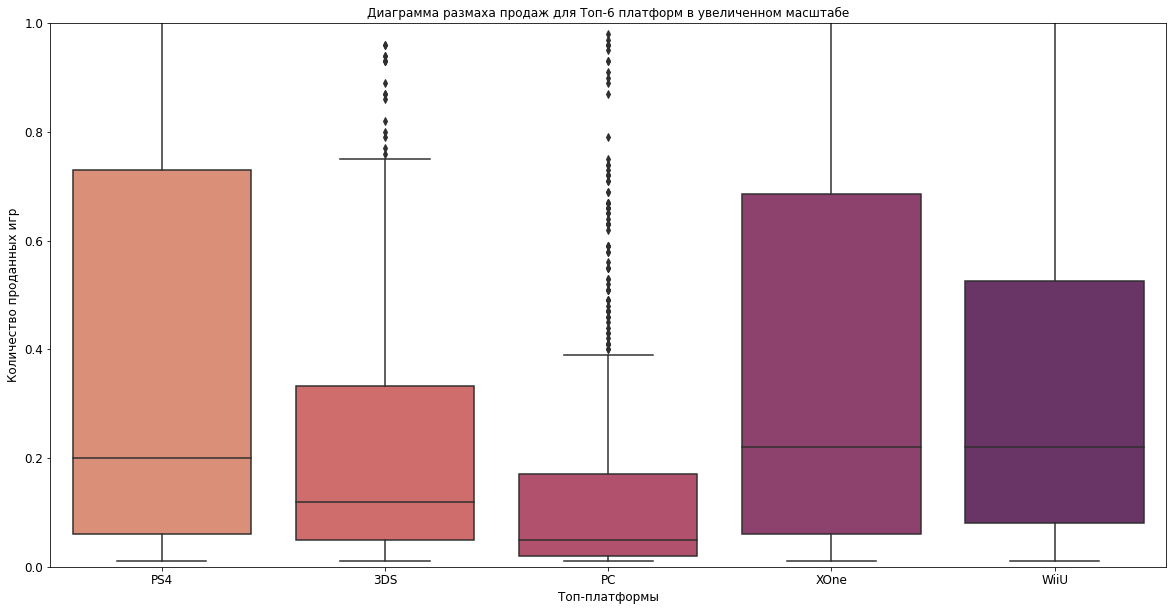

In [45]:
#Построим диаграмму размаха продаж для топ-6 платформ с измененным масштабом
plt.figure(figsize=[20, 10])
sns.boxplot(x='platform', y='total_sale', data=data.query('platform in @top_platforms_new'), palette="flare")
plt.rc('font', size= 15 )
plt.xlabel('Топ-платформы')
plt.ylabel('Количество проданных игр')
plt.ylim(0, 1)
plt.title('Диаграмма размаха продаж для Топ-6 платформ в увеличенном масштабе')

plt.show()

Из графика видим, что медианные продажи для платформ PS4, XOne, WiU близки и составляют 0,2 - 0,22 млн соответственно. При этом видим, что 3 квартиль у платформ PS4 и XOne достигает 0,73 и 0,68 млн соответственно, что значительно выше по сравнению с другими платформами. Таким образом, игры для PS4 и XOne с большей вероятностью будут продаваться в количестве до 0,7 млн, что обеспечит более стабильные продажи. 

Стоит отметить, что несмотря на высокие продаже на платформе 3DS 75% игр для этой платформы продаются в количестве до 0,33 млн копий. На основании чего можно сделать вывод, что в случае продвижения игр для это консоли, необходимо делать акцент на самые популярные серии, которые обеспечивали основной объем продаж


**Рассмотрим подробнее, какие игры имели самые высокие продажи в период 2012-2016**

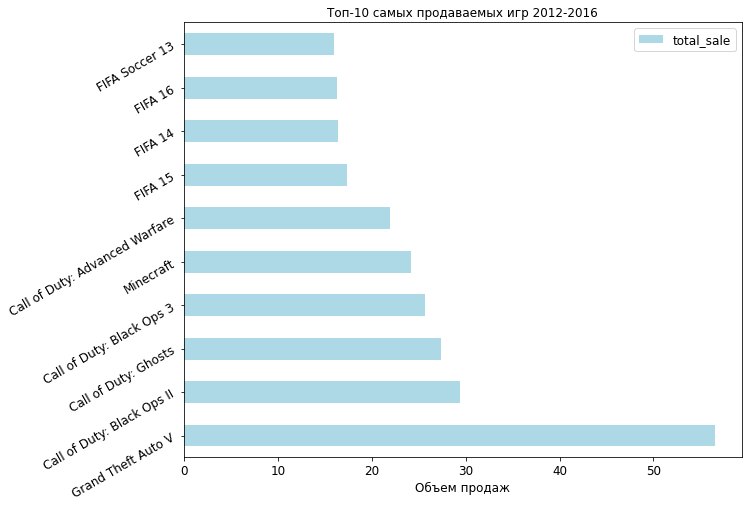

In [46]:
# Рассмотрим самые продаваемые игры за период после 2011 года
(
    sales_2012.pivot_table(index='name', values=['total_sale'], aggfunc='sum')
    .sort_values(by='total_sale', ascending=False).head(10)
    .plot(kind='barh', color='lightblue')
)
plt.xlabel('Объем продаж')
plt.ylabel('')
plt.title('Топ-10 самых продаваемых игр 2012-2016')
plt.yticks(rotation=30)
plt.show()

*Из графика видно, что наибольший объем продаж имеют серийные игры, выпускаемые каждый год или раз в несколько лет. Выход каждой части таких игр сопровождается высокими рейтингами ожидания, что стимулирует спрос.*

In [47]:
# Сравним общее количество продаж и продажи наиболее популярных игр с разбивкой по платформам
top_games=sales_2012.groupby('name')['total_sale'].sum().sort_values(ascending=False).head(10).index.values
sales_top_game=(
    sales_2012
    .pivot_table(index=['platform'], values='total_sale', aggfunc='sum')
)
sales_game=(
    sales_2012
    .query('name in @top_games')
    .pivot_table(index=['platform'], values='total_sale', aggfunc='sum')
    .merge(sales_top_game, right_index=True, left_index=True)
)

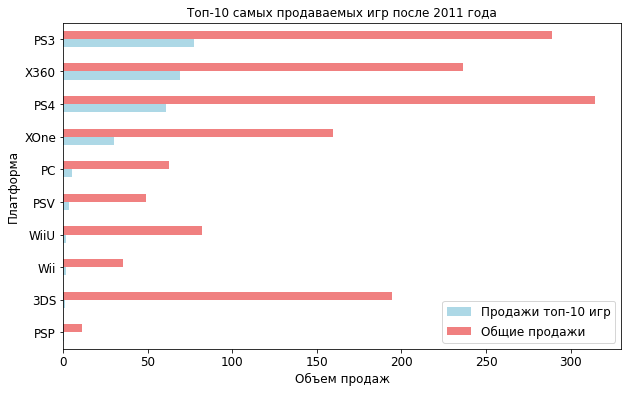

In [48]:
sales_game.sort_values(by='total_sale_x').plot(kind='barh', figsize=(10,6), color=['lightblue', 'lightcoral'])
plt.xlabel('Объем продаж')
plt.ylabel('Платформа')
plt.title('Топ-10 самых продаваемых игр после 2011 года')
plt.legend(['Продажи топ-10 игр', 'Общие продажи'])
plt.show()

- Из графика видно, что всего 10 игр составляет высокую долю от суммарных продаж для платформ PS3, PS4, X360, XOne.
- Несмотря на отоносительно высокий уровень продаж игр для платформы 3DS, наиболее популярные игры на ней не реализовываются. 

**На основании построенных графиков видно, что в продвижении нужно сконцентрироваться на играх, выпускаемых серийно. Необходимо отслеживание информации о релизах новых серий игр, так как успешное продвижение такого типа игр, перкрывает необходимость рекламы большого ассортимента игр, для которых продажи в несколько раз меньше**

In [49]:
#Установим список самых популярных игр для платформы 3DS
sales_2012.query('platform in "3DS"').groupby('name')['total_sale'].sum().sort_values(ascending=False).head(10).index

Index(['Pokemon X/Pokemon Y', 'Pokemon Omega Ruby/Pokemon Alpha Sapphire',
       'New Super Mario Bros. 2', 'Animal Crossing: New Leaf',
       'Super Smash Bros. for Wii U and 3DS', 'Pokemon Sun/Moon',
       'Tomodachi Life', 'Luigi's Mansion: Dark Moon',
       'Monster Hunter 4 Ultimate', 'Monster Hunter 4'],
      dtype='object', name='name')

**Выводы по анализу продаж по платформам:**


- Средняя продолжительность существования платформы 10 лет. Пика продаж игры для новых платформ достигают на 3-5 год жизни, после чего следует спад и снятие с продаж в связи с выходом новых версий консолей

- После 2011 года в лидеры по продажам вышла консоль PS4, за ней следуют платформы 3DS, XOne', PC, WiiU

- Объем продаж игр для всех платформ падает, что говорит о падении этого сегмента рынка в целом. При этом видим, что количство игр, выпускаемых для PS4 и XOne, растет

- В разрезе 2016 года целесообразно сконцентрироваться на продвижениии игр для PS4 и XOne, так как на этот момент возраст платформ 3 года и в течение нескольких лет будет продолжаться реализация этих консолей

- Медианные продажи для платформ PS4, XOne, WiU близки и составляют 0,2 - 0,22 млн соответственно
- 3 квартиль у платформ PS4 и XOne достигает 0,73 и 0,68 млн, что выше по сравнению с другими платформами
- игры для PS4 и XOne с большей вероятностью будут продаваться в количестве до 0,7 млн, что обеспечит более стабильные продажи
- несмотря на высокие общие продажеи на платформе 3DS 75% игр для этой платформы продаются в количестве до 0,33 млн копий
- На всех платформах есть ряд игр, продажа которых составляет миллионы копий, которые обеспечивают высокие суммарные продажи
- наибольший объем продаж имеют серийные игры, выпускаемые каждый год или раз в несколько лет. Выход каждой части таких игр сопровождается высокими рейтингами ожидания, что стимулирует спрос
- Наиболее популярные игры для платформы 3DS обеспеичвают высокие суммарные продажи. При этом для данной платформы список наиболее популярных игр отличается

#### Анализ зависимости продаж от оценки критиков и пользователей

Для анализа зависимости оценки критиков/пользователей от объема продаж рассмотрим консоль PS4 и X360.


PS4 - самая популярная на момент анализа консоль, X360 продукт конкурирующего бренда, давно присутствующий на рынке, при этом доля продаж игр на эту платформу за рассматриваемый период была высокой.

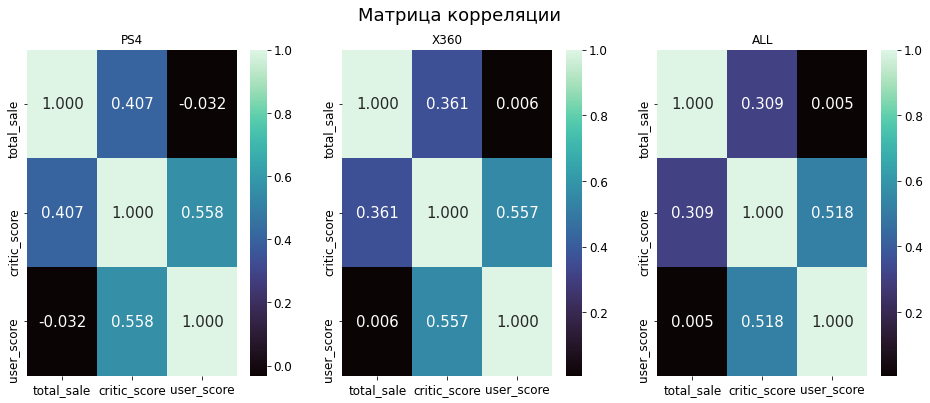

In [50]:
# Построим матрицы корреляции для параметров оценка критиков, оценка пользователей и объем продаж
fig= plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 3, 1)
ax1=sns.heatmap(sales_2012[sales_2012['platform']=='PS4'][['total_sale', 'critic_score', 'user_score']].corr(), annot=True, cmap='mako', fmt='.3f')
ax1.set_title('PS4')
ax2 = fig.add_subplot(1, 3, 2)
ax2=sns.heatmap(sales_2012[sales_2012['platform']=='X360'][['total_sale', 'critic_score', 'user_score']].corr(), annot=True, cmap='mako', fmt='.3f')
ax2.set_title('X360')
ax3 = fig.add_subplot(1, 3, 3)
ax3=sns.heatmap(sales_2012[['total_sale', 'critic_score', 'user_score']].corr(), annot=True, cmap='mako', fmt='.3f')
ax3.set_title('ALL')
plt.suptitle('Матрица корреляции')
plt.show()

*Из построенных матриц видно, что  корреляция между количеством проданных игр и рейтингом критиков составляет всего 0,4  для отдельных платформ и 0,245  для общей выборки данных. Эти значения свидетельствуют о невысокой зависимости между оценкой критиков и объемом продаж*

*Корреляция между рейтингом пользователей и продажами отсутствует.*

*Рейтинги критиков и пользователей также имеют среднюю зависимость.* 

*Для отдельных платформ и для общей выборки данных тенденции одинаковые. Однако зависимость между продажами и рейтингами критиков в общей выборке еще ниже, вероятно, это связано с высокой долей пропусков в общей выборке данных*

**Рассмотрим подробнее, как распределяются оценки и объемы продаж**

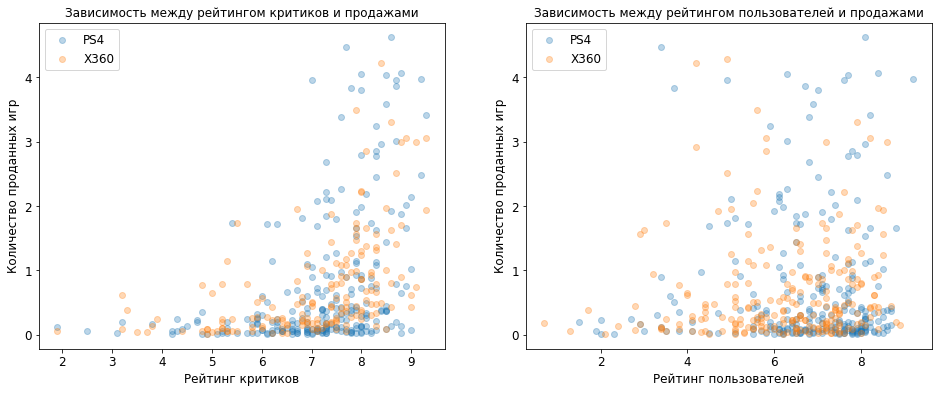

In [51]:
#Построим диаграмму рассеяния между продажами и рейтингом
cor1=sales_2012.query('platform=="PS4"and total_sale<5') #сузим диапазон продаж для наглядностит графика
cor2=sales_2012.query('platform=="X360" and total_sale<5 ')
fig= plt.figure(figsize=(16,6))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)
ax1.scatter('critic_score', 'total_sale', data=cor1, alpha=0.3)
ax1.scatter('critic_score', 'total_sale', data=cor2, alpha=0.3)
ax1.legend(['PS4', 'X360'])
ax1.set_xlabel('Рейтинг критиков')
ax1.set_ylabel('Количество проданных игр')
ax1.set_title('Зависимость между рейтингом критиков и продажами')
ax2.scatter('user_score', 'total_sale',data=cor1, alpha=0.3)
ax2.scatter('user_score', 'total_sale',data=cor2, alpha=0.3)
ax2.set_xlabel('Рейтинг пользователей')
ax2.set_ylabel('Количество проданных игр')
ax2.legend(['PS4', 'X360'])
ax2.set_title('Зависимость между рейтингом пользователей и продажами')
plt.show()

Из диаграммы видно, что наиболее продаваемые игры имеют рейтинг выше 7, однако основная выборка данных равномерно размещена в районе 6-8 баллов. 
 
В оценке пользователей большая часть отзывов сосредоточена в районе 8 баллов, при этом видим, что корреляция отсутствует, и самые продаваемые игры могут иметь как очень низкий, так и высокий рейтинг

На диаграмме видно, что игры с высокими продажами имеют низкий пользовательский рейтинг, что не соответсвует оценкам критиков

Рассмотрим подробнее рейтинги для наиболее популярных игр

In [52]:
PS4_sales=sales_2012.query('platform=="PS4"').sort_values(by='total_sale', ascending=False).head(10)

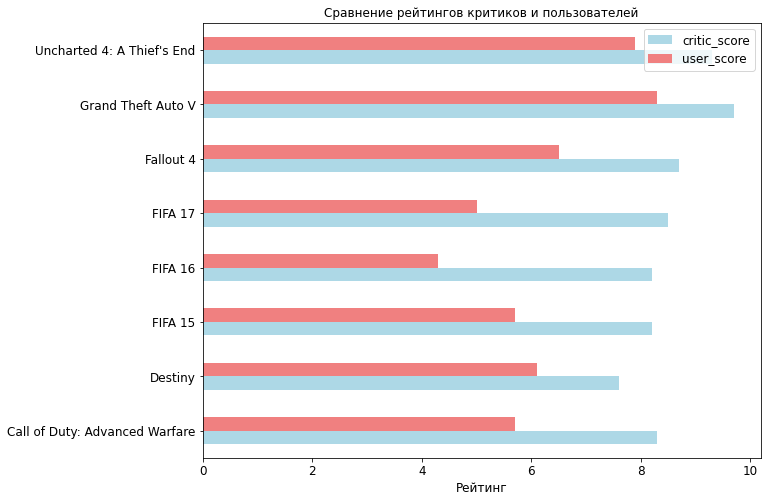

In [53]:
PS4_sales.pivot_table(index='name', values=['critic_score', 'user_score']).plot(kind='barh', color=['lightblue', 'lightcoral'])
plt.xlabel('Рейтинг')
plt.ylabel('')
plt.title('Сравнение рейтингов критиков и пользователей')
plt.show()


*Из графика видно, что для 10 наиболее продаваемых на платформе игр рейтинг пользователей в среднем на 30% ниже рейтинга критиков. Таким образом, можно установить, что эти категории людей оценивают игры по разным критериям и спрогнозировать, как они будут соотнесены между собой затруднительно. Можно предположить, что для каждой платформы будут свои особенности, которые не устраивают пользователей или критиков, в зависимости от этого разница будет отличаться для конкретных игр и жанров (недостаточный уровень графики, сюжет и т.д.)*

**Выводы по анализу зависимости рейтингов и продаж:**
-  наиболее продаваемые игры имеют рейтинг выше 7, однако основная выборка данных равномерно размещена в районе 6-8 баллов.Зависимость между этими показателями есть, но невысокая. При измении рейтинга от 6 до 8 в основном объеме продажи немного увеличиваются

- Корреляция между рейтингом пользователей и продажами отсутствует

- для наиболее продаваемых игр рейтинги пользователей и критиков значительно различаются

Таким образом, информация о рейтинге игры не является определяющей при планировании её дальнейшего продвижения. Однако, наиболее вероятно, что игры с рейтингом критиков выше 7 будут иметь выше уровень продаж


#### Анализ продаж по жанрам игр

In [54]:
# Рассмотрим, как соотносятся общее количество продаж и медианное значение для каждого жанра
genre_info=(
    sales_2012.groupby('genre')
    .agg(sales=('total_sale','sum'), copies=('total_sale','count'), mean=('total_sale','median'))
)

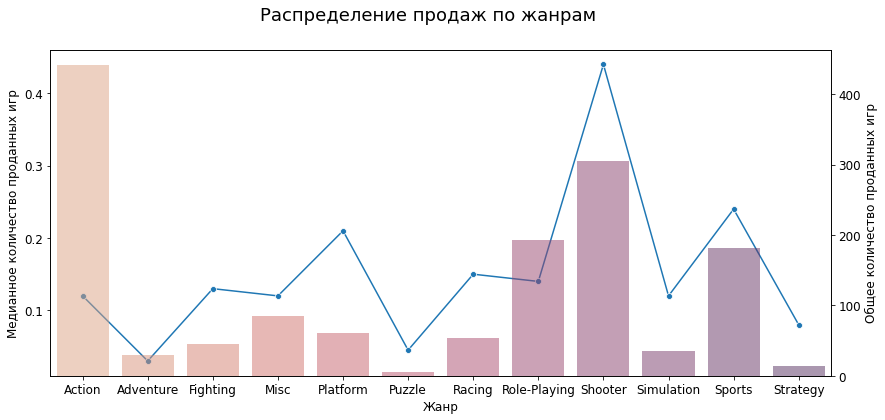

In [55]:
# Построим график сравнения этих величин
fig, ax1 = plt.subplots(figsize=(14,6))

sns.lineplot(data = genre_info['mean'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data =genre_info, x=genre_info.index, y=genre_info['sales'], alpha=0.5, ax=ax2, palette='flare')
ax1.set_xlabel('Жанр')
ax1.set_ylabel('Медианное количество проданных игр')
ax2.set_ylabel('Общее количество проданных игр')
plt.suptitle('Распределение продаж по жанрам')
plt.show()

In [56]:
top_genres=sales_2012.groupby('genre')['total_sale'].median().sort_values(ascending=False).head(5).index.values

Из полученного графика видим, что несмотря на высокие продажи экшн-игр, их медианное значение невысоко, а общие продажи обусловлены разнообразием этих игр, а также отдельными популярными играми, продажи которых высокие. С точки зрения дальнейшего продвижения наиболее интересны жанры игр, которые могут обеспечить стабильно высокие продажи для каждой игры.Топ-таких жанров: Shooter, Sports, Platform, Role-Playing, Racing

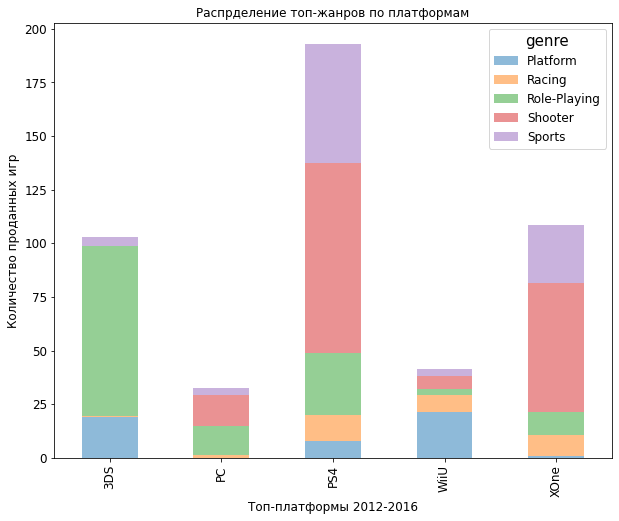

In [57]:
#Посмотрим, как распрделены общие продажи этих жанров по платформам
(
    sales_2012
    .query('genre in@top_genres and platform in@top_platforms_new')
    .pivot_table(index='platform', columns='genre', values='total_sale', aggfunc='sum').reset_index()
    .plot(x='platform', kind='bar', stacked=True, alpha=0.5)

)
plt.xlabel('Топ-платформы 2012-2016')
plt.ylabel('Количество проданных игр')
plt.title('Распрделение топ-жанров по платформам')
plt.show()

Из графика видно, что на платформах PS4 наибольшие продажи составляют шутеры и спортивные игры, тогда как для 3DS наиболее продаваемыми являются ролевые игры

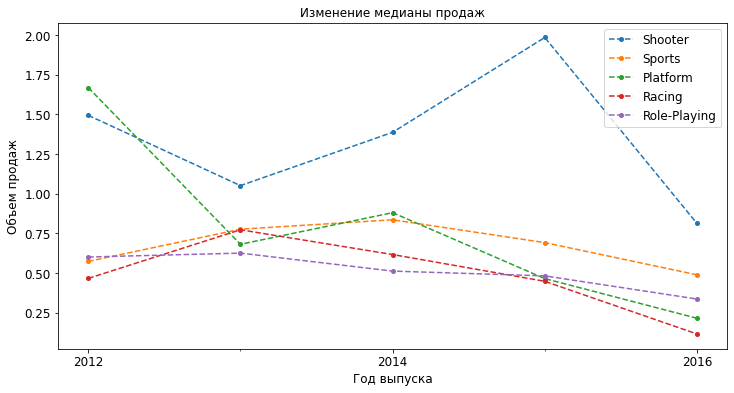

In [58]:
plot_sale(sales_2012,top_genres, 'genre', 'mean', 'Год выпуска', 'Объем продаж', 'Изменение медианы продаж')

Из графика видим, что медианные продажи шутеров стабильно демонстрирует наиболее высокие значения по сравнению с остальными жанрами

In [59]:
rating_info=sales_2012.groupby('rating_new').agg(sales=('total_sale','sum'), copies=('total_sale','count'), mean=('total_sale','median'))

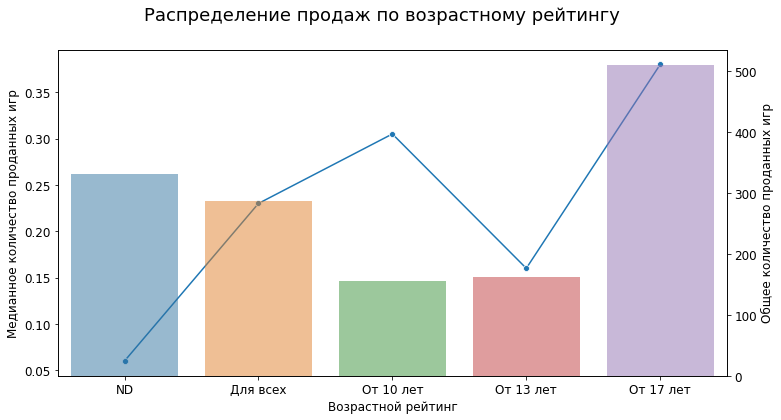

In [60]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = rating_info['mean'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data =rating_info, x=rating_info.index, y=rating_info['sales'], alpha=0.5, ax=ax2)

ax1.set_xlabel('Возрастной рейтинг')
ax1.set_ylabel('Медианное количество проданных игр')
ax2.set_ylabel('Общее количество проданных игр')
plt.suptitle('Распределение продаж по возрастному рейтингу')
plt.show()

Из построенного графика видим, что наиболее продаваемые игры с возрастным рейтингом "От 17 лет" и "Для всех". При этом отметим, что и медианные и общие продажи для этих категорий наиболее высокие. 

Доля игр с неопределнным рейтингом высокая, однако, их медианные продажи очень низкие

Общие выводы по анализу продаж в зависимости от жанра.

- Было устоновлено, что наиболее продаваемый жанр экшн достигает этих показателей за счет продаж отдельных популярных игр, а также большого ассортимента игр, представленных в этом жанре. 

- Наиболее стабильные продажи обеспечивают игры с жанрами Shooter, Sports, Platform, Role-Playing, Racing. При этом уровень продаж шутеров стабильно выше в течение рассматриваемого периода

- Наиболее продаваемые игры с возрастным рейтингом "От 17 лет" и "Для всех"   

#### Анализ продаж по регионам

In [61]:
# Зададим фукнцию для построения распределения параметров по регионам
def regions_sales(value, func):
    eu_sales=(
        sales_2012.pivot_table(index=[value], values='eu_sales', aggfunc=func)
        .sort_values(by='eu_sales', ascending=False).head()
    )
    na_sales=(
        sales_2012.pivot_table(index=[value], values='na_sales', aggfunc=func)
        .sort_values(by='na_sales', ascending=False).head()
    )
    jp_sales=(
        sales_2012.pivot_table(index=[value], values='jp_sales', aggfunc=func)
        .sort_values(by='jp_sales', ascending=False).head()
    )
    
    fig= plt.figure(figsize=(20,40))
    ax1=fig.add_subplot(1, 3, 1)
    ax1=eu_sales['eu_sales'].plot(kind='pie', labels=None, label='', autopct='%1.0f%%', legend=True, title='Продажи в Европе',cmap='YlOrRd')
    ax2=fig.add_subplot(1, 3, 2)
    ax2=na_sales['na_sales'].plot(kind='pie', labels=None, label='', autopct='%1.0f%%', legend=True, title='Продажи в Америке',cmap='YlOrRd')
    ax3=fig.add_subplot(1, 3, 3)
    ax3=jp_sales['jp_sales'].plot(kind='pie', labels=None, label='', autopct='%1.0f%%', legend=True, title='Продажи в Японии',cmap='YlOrRd')


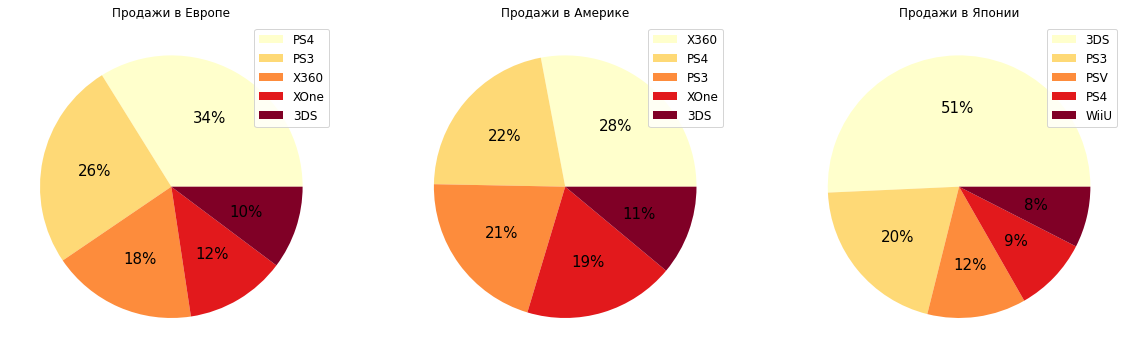

In [62]:
# Рассмотрим распрделение продаж по платформам
regions_sales('platform', sum) 

Из диаграмм видим, что топ продаж по платформам отличается во всех регионах. 

В Европе наиболее популярны игры для PlayStation, в Америке лидирует Xbox, при этом эти PS4, PS3, X360 составляют большую часть продаж для этих регионов за рассматриваемый период

В Японии рынок абсолютно другой и подавляющую часть продаж составляет японская консоль 3DS.

Рассмотрим, как изменялся спрос на игры для этих платформ по годам

In [63]:
# Создадим список популярных платформ для этих регионов
top_platform_regions=['PS4', 'PS3', 'X360', 'XOne', 'PSV', '3DS']

In [64]:
def regions_sales_year(table, item_list, column, func, xlabel, ylabel, title):
    legend=[]
    fig, ax =plt.subplots(1,3)
    for item in item_list:
        sales=(
            table[table[column] == item]
            .pivot_table(index='year_of_release', values='eu_sales', aggfunc=func)
            .reset_index().plot(x='year_of_release', y='eu_sales', ax=ax[0], style='--', marker='o', markersize=4, figsize=(12,6))
        )
        legend.append(item)
    ax[0].legend(legend)
    ax[0].set_ylabel(ylabel)
    ax[0].set_xlabel(xlabel)
    ax[0].set_title('Продажи в Европе')
    for item in item_list:
        sales=(
            table[table[column] == item]
            .pivot_table(index='year_of_release', values='na_sales', aggfunc=func)
            .reset_index().plot(x='year_of_release', y='na_sales', ax=ax[1], style='--', marker='o', markersize=4, figsize=(12,6))
        )
        legend.append(item)
    ax[1].legend(legend)
    ax[1].set_xlabel(xlabel)
    ax[1].set_title('Продажи в Америке')
    for item in item_list:
        sales=(
            table[table[column] == item]
            .pivot_table(index='year_of_release', values='jp_sales', aggfunc=func)
            .reset_index().plot(x='year_of_release', y='jp_sales', ax=ax[2], style='--', marker='o', markersize=4, figsize=(12,6))
        )
        legend.append(item)
    ax[2].legend(legend)
    ax[2].set_xlabel(xlabel)
    ax[2].set_title('Продажи в Японии')
    plt.suptitle(title)
    plt.show()

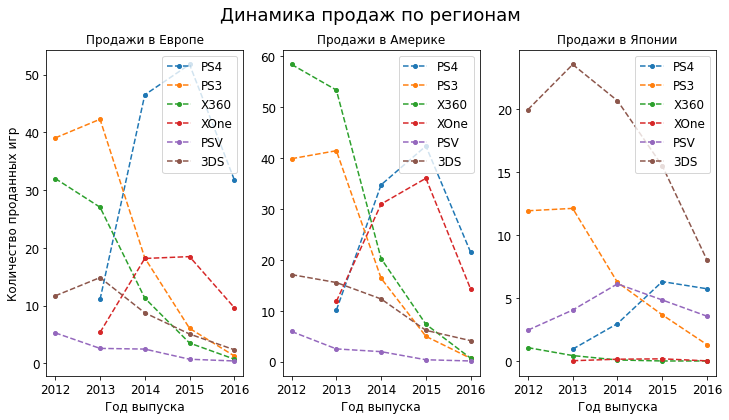

In [65]:
regions_sales_year(sales_2012, top_platform_regions, 'platform', sum, 'Год выпуска', 'Количество проданных игр', 'Динамика продаж по регионам')

Из графиков видим, что продажи игр падают по всем регионам. 

Продажи игр для PS3 и X360 практически достигает нуля в 2016 году. В Европе популярность игр для PS4 значительно выше по сравнению с остальными платформами. Немостря на падающий спрос, их доля в общих продажах остается высокой, что позволяет предположить, что продажи в этом регионе игр для PS4 будут лидировать в следуюдем году

В Америке продажи игр для PS4 и Xone близки, при этом динамика их продаж также аналогична. В данном регионе целесообразно продвигать игры для обеих платформ, так как их доля на рынке близка.

В Японии отмечается падение спроса на платформу 3DS, доля которой в общем объеме продаж значительна, при этом набирает популярность игры для PS4, таким образом, для данного региона целесообразно продвижение как 3DS, так как их доля в продажах всё еще остается высокой, так и для PS4

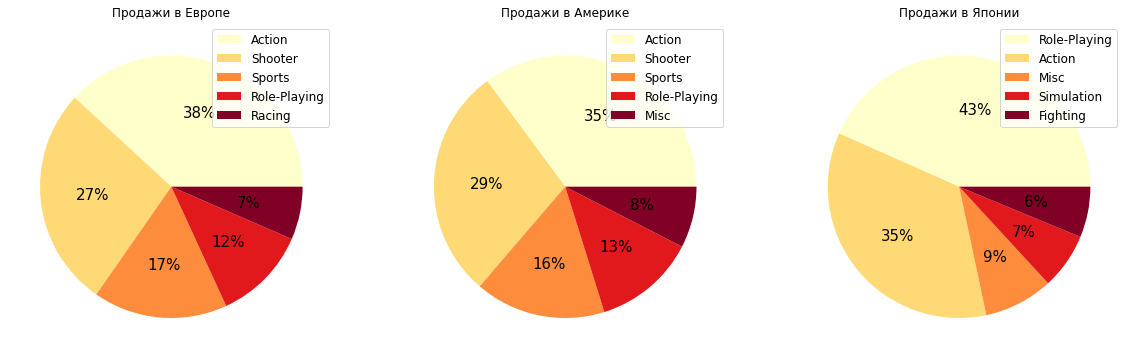

In [66]:
regions_sales('genre', 'sum') 

Из диаграммы видим, что в Америке и Европе основную долю продаж составляют экшны и шутеры. При этом, как было установлено ранее в анализе, шутеры имеют более высокие медианные значения.

В Японии наибольшую популярность имеют шутеры и экшны


Рассмотрим динамику продаж игр этих жанров по годам

In [67]:
# Зададим список самых продаваемых жанров для этих регионов
top_genres_regions=['Shooter', 'Sports', 'Role-Playing', 'Racing']

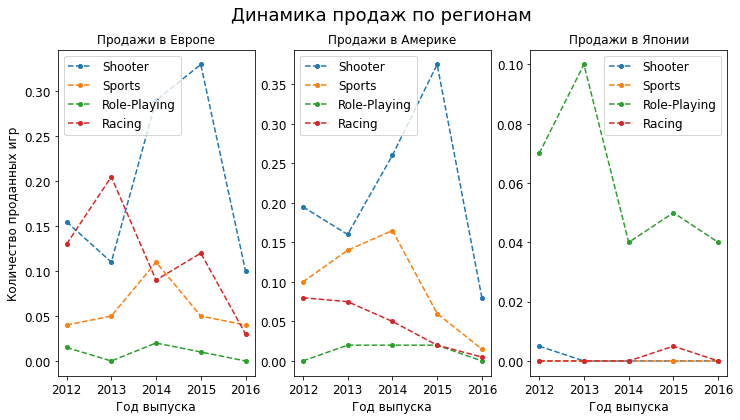

In [68]:
regions_sales_year(sales_2012, top_genres_regions, 'genre', 'median', 'Год выпуска', 'Количество проданных игр', 'Динамика продаж по регионам')

В Европе и Америке шутеры имеют наиболее высокие медианные продажи. При этом видим, что в Европе изменяется структура спроса и спортивные игры начинают превалировать над гонками. Таким образом, можно спрогнозировать, что наиболее популярными будут спортивные игры и шутеры
В Америке продажи медианные продажи шутеров значительно выше, поэтому в данном регионе целесообразно сконцентрироваться на этом жанре
В Японии стабильно высокие значение демонстрируют ролевые игры. 

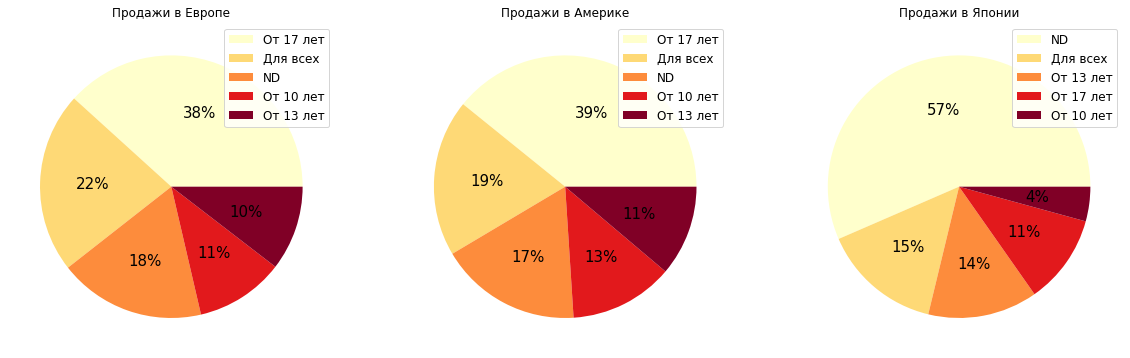

In [69]:
regions_sales('rating_new', 'sum')

Из диаграмм видим, что в Европе и Америке основную долю продаж составляют игры для всех возрастов и выше 17 лет. При этом выосокую долю составляют игры, для которых возрастной рейтинг не определен. Скорее всего, это игры европейского производства
В Японии стоит отметить, что основная доля игр не имеет возрастного рейтинга, так как в данном регионе реализовываются игры местного производства, для которых не присваивается рейтинг ESRB 

### Проверка гипотез

Нулевая гипотеза Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Альтернативная гипотеза Н1:Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [70]:
xone_ratings = sales_2012[(sales_2012['platform'] == 'XOne') & (sales_2012['user_score'] > 0)]['user_score']
pc_ratings = sales_2012[(sales_2012['platform'] == 'PC') & (sales_2012['user_score'] > 0)]['user_score']
alpha = 0.05
results = st.ttest_ind(xone_ratings, pc_ratings, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5065901030514671
Не получилось отвергнуть нулевую гипотезу


Вероятность получить разницу в рейтингах случайным образом высокая. Поэтому нулевую гипотезу отвергаем. 

Нулевая гипотеза Н0: Средние пользовательские рейтинги жанров Action  и Sports одинаковые


Альтернативная гипотеза Н1:Средние пользовательские рейтинги жанров Action  и Sports отличаются

In [71]:
action_ratings = sales_2012[(sales_2012['genre'] == 'Action') & (sales_2012['user_score'] > 0)]['user_score']
pc_ratings = sales_2012[(sales_2012['genre'] == 'Sports') & (sales_2012['user_score'] > 0)]['user_score']
alpha = 0.05
results = st.ttest_ind(action_ratings, pc_ratings, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Вероятность получить разницу в рейтингах случайным образом ниже статистического уровня значимости. Гипотезу отвергаем

### Общий вывод

1. На этапе предобработки данных проекта были проведены следующие действия:
- Удалены строки с прорущенными значениями в годах выпуска и названий игр, так как идентифицировать их можно в основном только вручную, при этом они составляли около 1,6% от общего объема данных
- Рейтинги пользователей и критиков приведены к 10-й балльной шкале
- Дана расшифровка возрастных рейтингов в отдельном столбце
- Заменен формат данных в столбцах рейтинг пользователей и годы выпуска


В ходе анализа пропусков в строках датасета было установлено:


- Рейтинги пользоватлелей/критиков появляются после 1999 года,возможно, не было системы/платформы, на которой аккумулировались эти данные.
- Доля пропусков в возрастном рейтинге резко снижается после 1999 года, так как данная организация начала действовать в 1994 году и присвоение рейтинга происходило постепенно
- количество пропусков в отзывах возрастает с увеличением количества выпускаемых игр, 
- доля продаж игр без рейтинга от общих продаж низкая. Скорее всего, это малопопулярные игры, которые не набрали нужного количества отзывов для формирования оценки
- Количество пропусков начинает увеличиваться после 2005 года, скорее всего, это связано с выпуском нового поколения консолей, для которых выпускалось большое количество разных малопопулярных игр
- Пропуски в столбцах рейтинга критиков и пользователей не обрабатывались, так как эти данные не имеют очевидной корреляции с другими параметрами


2. На этапе анализа продаж от других параметров были выполнены следующие действия:

- Оценена динамика продаж игр для наиболее популярных платформ за весь период наблюдения. Установлено, что продажи в целом падают
- На основании средней продолжительности жизни платформ в 10 лет выбран период наблюдения 2012 - 2016 для дальнейшего анализа

В ходе анализа продаж установлено:


- Игры для новых платформ достигают пика продаж на 2-4 год жизни, после чего следует спад и снятие с продаж в связи с выходом новых версий консолей

- После 2011 года в лидеры по продажам вышла консоль PS4, за ней следуют платформы 3DS, XOne', PC, WiiU

- Объем продаж игр для всех платформ падает, что говорит о падении этого сегмента рынка в целом. При этом видим, что количство игр, выпускаемых для PS4 и XOne, растет

- В разрезе 2016 года целесообразно сконцентрироваться на продвижениии игр для PS4 и XOne, так как на этот момент возраст платформ 3 года и в течение нескольких лет будет продолжаться реализация этих консолей


- **Медианные продажи для платформ PS4, XOne, WiU близки и составляют 0,2 - 0,22 млн соответственно. При этом  3 квартиль у платформ PS4 и XOne достигает 0,73 и 0,68 млн соответственно, что значительно выше по сравнению с другими платформами. Игры для PS4 и XOne с большей вероятностью будут продаваться в количестве до 0,7 млн, что обеспечит более стабильные продажи**

- **Несмотря на высокие продажи на платформе 3DS 75% игр для этой платформы продаются в количестве до 0,33 млн копий. Для продвижения игр для это консоли, необходимо делать акцент на самые популярные серии, которые обеспечивали основной объем продаж**
- **На платформах PS4 и 3DS было продано наибольшее количество копий одной игры

- На всех платформах есть ряд игр, продажа которых составляет миллионы копий, которые обеспечивают высокие суммарные продажи

- Наибольший объем продаж имеют серийные игры, выпускаемые каждый год или раз в несколько лет. Выход каждой части таких игр сопровождается высокими рейтингами ожидания, что стимулирует спрос

- **Для платформы 3DS список топ-игр отличается, что необходимо учитывать при разработке плана продвижения игр для этой платформы**


- Наиболее продаваемые игры имеют рейтинг выше 7, однако основная выборка данных равномерно размещена в районе 6-8 баллов.Зависимость между этими показателями есть, но невысокая. При измении рейтинга от 6 до 8 в основном объеме продажи немного увеличиваются

- Корреляция между рейтингом пользователей и продажами отсутствует

- Для наиболее продаваемых игр рейтинги пользователей и критиков значительно различаются

- Наиболее продаваемый жанр экшн достигает этих показателей за счет продаж отдельных популярных игр, а также большого ассортимента игр, представленных в этом жанре. 

- Наиболее стабильные продажи обеспечивают игры с жанрами Shooter, Sports, Platform, Role-Playing, Racing. При этом уровень продаж шутеров стабильно выше в течение рассматриваемого периода

- Наиболее продаваемые игры с возрастным рейтингом "От 17 лет" и "Для всех" 

- В Европе популярность игр для PS4 значительно выше по сравнению с остальными платформами. 

- В Америке продажи игр для PS4 и Xone близки, при этом динамика их продаж также аналогична. 

- В Японии отмечается падение спроса на платформу 3DS, доля которой в общем объеме продаж значительна, при этом набирает популярность игры для PS4

- В Европе и Америке шутеры имеют наиболее высокие медианные продажи

- В Японии стабильно высокие значение демонстрируют ролевые игры

- В Европе и Америке основную дол продаж составляют игры для всех возрастов и выше 17 лет

- В Японии стоит отметить, что основная доля игр не имеет возрастного рейтинга, так как в данном регионе реализовываются игры местного производства, для которых не присваивается рейтинг ESRB 

Рекомендации для планирования продвижения:

- Акцент в продвижении, следует делать на игры для консолей топовых производителей Sony, Microsoft, Nintendo. В разрезе 2016 года целесообразно сконцентрироваться на продвижениии игр для PS4 и XOne, так как на этот момент возраст платформ 3 года и в течение нескольких лет будет продолжаться реализация этих консолей. При этом в стоит учитывать особенности региона реализации игр, так как в Японии наиболее популярны игры для платформы 3DS, однако начинает набирать популярность игр для PS4.

- Для продвижения на европейском и американском рынке стоит сконцентрироваться на шутерах и спортивных играх. В Японии предпочтение стоит отдать ролевым играм 

- Отдельным блоком необходимо отслеживание выпусков серийных игр и их активное продвижение, в случае планируемого релиза новой части, так как данные игры обеспечивают высокую долю от продаж всего ассортимента игр

- Стоит обращать внимание на игры с рейтингом выше 7, так как наиболее продаваемые игры имеют такой рейтинг, также в этом диапазоне наблюдается относительное увеличение продаж при увеличении рейтинга. Учитывать рейтинг пользователей нецелесообразно, так как нет корреляции с продажами 

- Для европейского и американского рынка стоит продвигать игры с рейтингом  от 17 лет и для всех, тогда как для Японии этот рейтинг не релевантен